<a href="https://colab.research.google.com/github/ThierryYeffou/Analyze-ecommerce-data/blob/main/Projet_data_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importer les packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#Collecter la liste de fichiers (datasets)
path = '/content/Projet'
all_files = [file for file in os.listdir(path)]
#Affichons le contenu de notre list de fichiers
for file in all_files:
    print(file)

Sales_June_2019.csv
Sales_May_2019.csv
Sales_March_2019.csv
Sales_April_2019.csv
Sales_October_2019.csv
Sales_February_2019.csv
Sales_August_2019.csv
Sales_September_2019.csv
Sales_January_2019.csv
Sales_November_2019.csv
Sales_July_2019.csv
Sales_December_2019.csv


In [ ]:
#Creons une base de données pour regrouper les fichiers
all_data = pd.DataFrame()
path = '/content/Projet'
for file in all_files:
    #lecture du fichier courant
    current_file = pd.read_csv(path+'/'+file)
    #ajout/concatenation de la base avec le fichier courant
    all_data = pd.concat([all_data,current_file])

In [ ]:
#Génerons un fichier csv contenant toutes nos données :
all_data.to_csv(path+'/all_data.csv', index=False)


In [ ]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
all_data.shape

(186850, 6)

In [ ]:
#Nombre de ligne vide
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
#Suppression des valeurs manquantes
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 6)

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


## **Trouvons le mois ayant réalisé le meilleur chiffre d'affaire**


In [ ]:
#function qui extrait et retourne le mois sur le format date
def month(format_date):
    return format_date.split('/')[0]
month("04/19/19 08:46")

'04'

In [ ]:
#Stocquons dans une colonne de la base de donnée le mois extrait :
all_data["Month"]=all_data["Order Date"].apply(month)
all_data.head()

<ipython-input-12-c1443b8f9f44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"]=all_data["Order Date"].apply(month)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",06
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",06
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",06


In [ ]:
#Convertissons les mois en int pour faire nos opérations :
all_data["Month"].unique()

array(['06', 'Order Date', '07', '05', '03', '04', '10', '11', '02', '08',
       '09', '01', '12'], dtype=object)

In [ ]:
all_data=all_data[all_data["Month"]!="Order Date"]
all_data["Month"].unique()

array(['06', '07', '05', '03', '04', '10', '11', '02', '08', '09', '01',
       '12'], dtype=object)

In [ ]:
#Convertissons les mois en int pour faire nos opérations :
all_data["Month"]=all_data["Month"].astype(int)
all_data["Month"].unique()

array([ 6,  7,  5,  3,  4, 10, 11,  2,  8,  9,  1, 12])

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6


In [ ]:
#Convertissons les quantité et prix respectivement en int et float pour faire nos opérations :
all_data["Price Each"]=all_data["Price Each"].astype(float)
all_data["Quantity Ordered"]=all_data["Quantity Ordered"].astype(int)
all_data.dtypes
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [ ]:
#Calculons le prix total de chaque commande et insérons le dans le tableau
all_data["Sales"]= all_data["Price Each"]*all_data["Quantity Ordered"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99


In [ ]:
#Déterminons au regard de nos données le mois ayant le plus grand chiffre d'affaire :
all_data.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

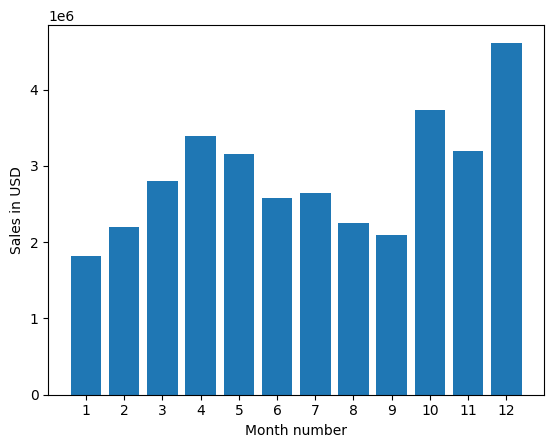

In [ ]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

# **On peut deduire que les commandes sont abondantes sur le mois de decembre due aux fêtes**

# **Ville ayant le plus grand nombre de commande**

In [ ]:
def city(adress):
    return adress.split(',')[1]

 #simulation de la function
city("609 Cherry St, Dallas, TX 75001")

' Dallas'

In [ ]:
all_data['city'] = all_data['Purchase Address'].apply(city)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95,Portland
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99,Seattle
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas


In [ ]:
#La ville ayant le plus de vente :
all_data.groupby("city")["city"].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

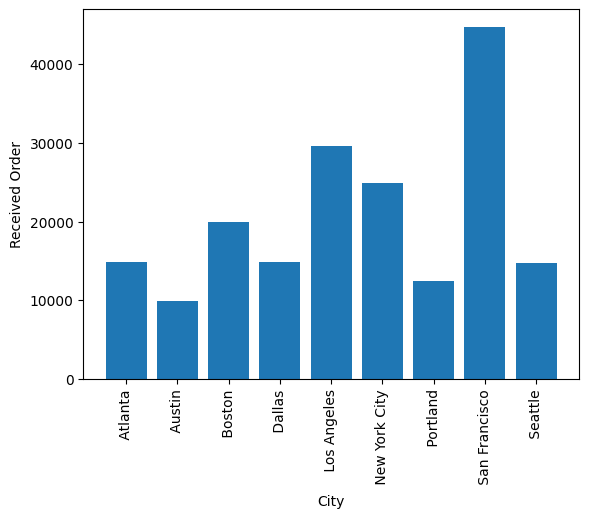

In [ ]:
plt.bar(all_data.groupby('city')['city'].count().index, all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Received Order')
plt.xlabel('City')
plt.show()

**DERTERMINONS A QUELLE HEURE FAIRE LA PUBLICITE**

In [ ]:
all_data["Hour"]=pd.to_datetime(all_data["Order Date"]).dt.hour
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95,Portland,19
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco,10
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles,20
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99,Seattle,10
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco,18
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco,20
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles,12
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle,6
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas,10


In [ ]:
all_data.groupby("Hour")["city"].count()

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: city, dtype: int64

Text(0, 0.5, 'Nombre de commande')

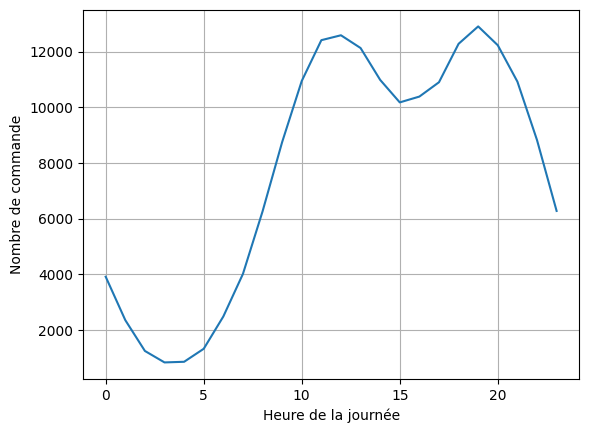

In [ ]:
plt.grid()
plt.plot(all_data.groupby("Hour")["city"].count().index, all_data.groupby("Hour")["city"].count())
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de commande')

In [ ]:
all_data.groupby("Product")["Quantity Ordered"].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

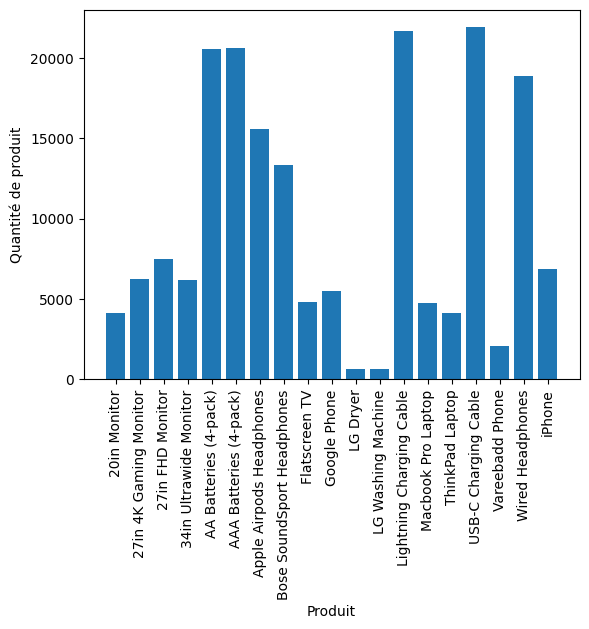

In [ ]:
plt.bar(all_data.groupby('Product')['Quantity Ordered'].count().index, all_data.groupby('Product')['Quantity Ordered'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Quantité de produit')
plt.xlabel('Produit')
plt.show()